## Introduction

>Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those? `relevant rubric items: “data exploration”, “outlier investigation”`

### Goal

Identify Enron Employees who may have committed fraud based on the public Enron financial and email dataset.

### Why ML helps with this problem

Please think that you have become an audit team to deal with this problem. The data used for this problem contains tens of thousands of mails. How long will it take to grasp this manually?

Also, do not miss the problem, can you inject a lot of resources?

Machine learning solves these problems. Machine learning will find certain regularity from large amounts of data and identify cheaters. Also, you may discover something that people do not notice.z

### From the viewpoint of datasets

Let's think about this reason while looking at the data set.

In [34]:
# library import
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import pandas as pd
import numpy as np

# Visualisation
import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

# Machine Learning 
from sklearn.datasets import load_boston
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import svm, datasets, cross_validation
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [35]:
# helper methods
#https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
         annot_kws = { 'fontsize' : 12 }
    )

In [36]:
#dataload
data = pd.read_pickle("final_project_dataset.pkl")
data_keys = data["ALLEN PHILLIP K"].keys()

In [37]:
df = pd.DataFrame(data).T
df.tail()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
WINOKUR JR. HERBERT S,NaN,NaN,-25000,108579,NaN,NaN,1413,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,84992,NaN
WODRASKA JOHN,NaN,NaN,NaN,NaN,john.wodraska@enron.com,NaN,NaN,NaN,NaN,NaN,...,NaN,189583,False,NaN,NaN,NaN,NaN,NaN,189583,NaN
WROBEL BRUCE,NaN,NaN,NaN,NaN,NaN,139130,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,139130
YEAGER F SCOTT,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552,53947,NaN,NaN,NaN,...,NaN,147950,True,3576206,NaN,158403,NaN,NaN,360300,11884758
YEAP SOON,NaN,NaN,NaN,NaN,NaN,192758,55097,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,55097,192758


In [38]:
df.columns

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')

### features
- bonus: 
- deferral_payments: 
- deferred_income: 
- director_fees: 
- email_address: 
- exercised_stock_options: 
- expenses: 
- from_messages: 
- from_poi_to_this_person: 
- from_this_person_to_poi: 
- loan_advances: 
- long_term_incentive: 
- other: 
- poi: 
- restricted_stock: 
- restricted_stock_deferred: 
- salary: 
- shared_receipt_with_poi: 
- to_messages: 
- total_payments: 
- total_stock_value: 



In [39]:
df.dtypes

bonus                        object
deferral_payments            object
deferred_income              object
director_fees                object
email_address                object
exercised_stock_options      object
expenses                     object
from_messages                object
from_poi_to_this_person      object
from_this_person_to_poi      object
loan_advances                object
long_term_incentive          object
other                        object
poi                          object
restricted_stock             object
restricted_stock_deferred    object
salary                       object
shared_receipt_with_poi      object
to_messages                  object
total_payments               object
total_stock_value            object
dtype: object

total number of data points

In [40]:
df.shape[0]

146

allocation across classes (POI/non-POI)

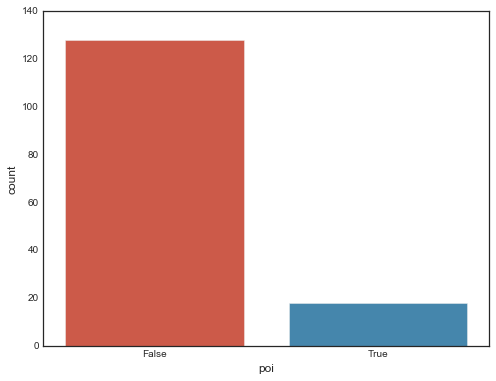

In [41]:
sns.countplot(df['poi']) 

In [42]:
# df = df.where(df != "NaN", pd.np.nan)
df = df.where(df != "NaN", -1)

In [43]:
df["bonus"] = df["bonus"].astype('int64')
df["deferral_payments"] = df["deferral_payments"].astype('int64')
df["deferred_income"] = df["deferred_income"].astype('int64')
df["director_fees"] = df["director_fees"].astype('int64')
# df["email_address"] = df["email_address"].astype('')
df["exercised_stock_options"] = df["exercised_stock_options"].astype('int64')
df["expenses"] = df["expenses"].astype('int64')
df["from_messages"] = df["from_messages"].astype('int64')
df["from_poi_to_this_person"] = df["from_poi_to_this_person"].astype('int64')
df["from_this_person_to_poi"] = df["from_this_person_to_poi"].astype('int64')
df["loan_advances"] = df["loan_advances"].astype('int64')
df["long_term_incentive"] = df["long_term_incentive"].astype('int64')
df["other"] = df["other"].astype('int64')
df["poi"] = df["poi"].astype('bool')
df["restricted_stock"] = df["restricted_stock"].astype('int64')
df["restricted_stock_deferred"] = df["restricted_stock_deferred"].astype('int64')
df["salary"] = df["salary"].astype('int64')
df["shared_receipt_with_poi"] = df["shared_receipt_with_poi"].astype('int64')
df["to_messages"] = df["to_messages"].astype('int64')
df["total_payments"] = df["total_payments"].astype('int64')
df["total_stock_value"] = df["total_stock_value"].astype('int64')

In [44]:
# df["other"][:10]
# df["loan_advances"][:10]
# df["long_term_incentive"][:10]

In [45]:
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,-1,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,-1,178980,-1,-1,-1,257817,3486,-1,-1,-1,...,-1,-1,False,-1,-1,-1,-1,-1,182466,257817
BANNANTINE JAMES M,-1,-1,-5104,-1,james.bannantine@enron.com,4046157,56301,29,39,0,...,-1,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,-1,-1,6680544,11200,-1,-1,-1,...,1586055,2660303,False,3942714,-1,267102,-1,-1,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,-1,frank.bay@enron.com,-1,129142,-1,-1,-1,...,-1,69,False,145796,-82782,239671,-1,-1,827696,63014


In [46]:
df = df.where(df != -1, pd.np.nan)

In [47]:
df.isnull()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BADUM JAMES P,True,False,True,True,True,False,False,True,True,True,...,True,True,False,True,True,True,True,True,False,False
BANNANTINE JAMES M,True,True,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
BAXTER JOHN C,False,False,False,True,True,False,False,True,True,True,...,False,False,False,False,True,False,True,True,False,False
BAY FRANKLIN R,False,False,False,True,False,True,False,True,True,True,...,True,False,False,False,False,False,True,True,False,False
BAZELIDES PHILIP J,True,False,True,True,True,False,True,True,True,True,...,False,False,False,True,True,False,True,True,False,False
BECK SALLY W,False,True,True,True,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
BELDEN TIMOTHY N,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
BELFER ROBERT,True,False,True,False,True,False,True,True,True,True,...,True,True,False,True,False,True,True,True,False,False
BERBERIAN DAVID,True,True,True,True,False,False,False,True,True,True,...,True,True,False,False,True,False,True,True,False,False


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
email_address                111 non-null object
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
other                        93 non-null float64
poi                          146 non-null bool
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receipt_with_poi      86 non-null float64

## Processing missing values
In order to process missing values, first search for missing patterns

In [49]:
columns = ["bonus","deferral_payments","deferred_income","director_fees","email_address","exercised_stock_options","expenses","from_messages","from_poi_to_this_person","from_this_person_to_poi","loan_advances","long_term_incentive","other","poi","restricted_stock","restricted_stock_deferred","salary","shared_receipt_with_poi","to_messages","total_payments","total_stock_value"]

missing = df.copy()
# 欠損している場合に True とする
missing = missing.apply(pd.isnull, axis=0)
missing['count'] = 1
missing.groupby(columns).sum()

count
bonus deferral_payments deferred_income director_fees email_address exercised_stock_options expenses from_messages from_poi_to_this_person from_this_person_to_poi loan_advances long_term_incentive other poi   restricted_stock restricted_stock_deferred salary shared_receipt_with_poi to_messages total_payments total_stock_value       
False False             False           False         True          False                   False    True          True                    True                    False         False               False False False            False                     False  True                    True        False          False                  1
                                        True          False         False                   False    False         False                   False                   False         False               False False False            True                      False  False                   False       False          False                  2
                                                                                                                                                                   True          False               False False False            False                     False  False                   False       False          False                  2
                                                                                                                                                                                 True                False False False            False                     False  False                   False       False          False                  1
                                                                                                                                                                                                                                  True                      False  False                   False       False          False                  2
                                                                                                     True          True                    True                    True          False               False False False            False                     False  True                    True        False          False                  1
                                                                                            True     False         False                   False                   True          False               False False False            True                      False  False                   False       False          False                  3
                                                                    True                    False    False         False                   False                   True          True                False False False            True                      False  False                   False       False          False                  1
                                                                                                     True          True                    True                    True          True                False False False            False                     False  True                    True        False          False                  1
                                                      True          False                   False    True          True                    True                    True          False               False False False            False                     False  True                    True        False          False                  1
                                                                                                                                                                                                                                  True                      False  True                    True        False         

First we checked the pattern of missing values. It is found that it is randomly missing except for one.  
expect for **restricted_stock_deferred** and **loan_advances** are **True**.

In other words, you can see that it is Missing Not At Random (MNAR).  
In this case, there is no effective method surely, and a bias such as FIML also occurs.

For methods that are somewhat effective, the following can be mentioned

- Create auxiliary variables
- Do not use that variable

Check correlation and investigate whether any variables are auxiliary variables.

In [50]:
df.corr()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
bonus,1.000000,0.978808,-0.980138,NaN,0.990518,0.989117,0.052725,0.562187,0.354634,0.640266,0.995012,0.961757,-0.013837,0.985062,-0.975080,0.993425,0.549102,0.372997,0.963154,0.990202
deferral_payments,0.978808,1.000000,-0.994974,1.000000,0.960891,0.973234,0.321947,0.424101,0.206993,0.356130,0.971950,0.958584,-0.084502,0.970340,-0.996176,0.977846,0.356696,0.310129,0.923344,0.963424
deferred_income,-0.980138,-0.994974,1.000000,-0.995729,-0.977234,-0.970539,-0.319995,-0.178951,-0.271673,-0.433300,-0.982358,-0.945725,0.014201,-0.971404,0.973253,-0.977737,-0.394677,-0.350815,-0.925775,-0.975203
director_fees,NaN,1.000000,-0.995729,1.000000,0.996597,0.995207,1.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,0.999011,-0.565314,NaN,1.000000,-1.000000,0.994356,0.997112
exercised_stock_options,0.990518,0.960891,-0.977234,0.996597,1.000000,0.983227,-0.066129,0.160253,-0.030101,0.665824,0.990516,0.967541,0.052886,0.991501,-0.475566,0.992739,0.154333,0.079568,0.965020,0.998869
expenses,0.989117,0.973234,-0.970539,0.995207,0.983227,1.000000,0.094144,-0.059244,0.014964,0.600193,0.988083,0.953230,-0.044508,0.982824,-0.976320,0.995945,0.223495,0.155070,0.946242,0.984372
from_messages,0.052725,0.321947,-0.319995,1.000000,-0.066129,0.094144,1.000000,0.186708,0.588687,-0.213768,-0.071958,-0.101686,-0.074308,0.003145,-0.326671,-0.003541,0.230855,0.475450,-0.033089,-0.036310
from_poi_to_this_person,0.562187,0.424101,-0.178951,NaN,0.160253,-0.059244,0.186708,1.000000,0.445063,0.009878,0.212538,0.111249,0.167722,0.133594,-0.455876,0.179055,0.659264,0.525667,0.154431,0.146366
from_this_person_to_poi,0.354634,0.206993,-0.271673,1.000000,-0.030101,0.014964,0.588687,0.445063,1.000000,0.934835,0.083591,-0.110335,0.112940,0.049284,-0.398550,0.021288,0.475748,0.568506,0.011556,0.001289
loan_advances,0.640266,0.356130,-0.433300,NaN,0.665824,0.600193,-0.213768,0.009878,0.934835,1.000000,0.553638,0.584598,0.560178,0.585069,NaN,0.600576,0.291501,0.739805,0.816098,0.667922


Looking at the correlation, we can see that both restricted_stock_deferred and loan_advances have a very strong correlation of 0.97 or more.  
Therefore, by not using these variables, put the data set in the state of Missing Completely At Random (MCAR).

Therefore, this time I will simply process the missing value with the average value.


In [51]:
for column in df:
    if column not in ("poi", "email_address"):
        df[column] = df[column].fillna(df[column].mean())
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4.175000e+06,2.869717e+06,-3.081055e+06,166804.882353,phillip.allen@enron.com,1.729541e+06,13868.0,2195.000000,47.000000,65.000000,...,3.048050e+05,1.520000e+02,False,1.260270e+05,-126027.000000,201955.000000,1407.000000,2902.000000,4484442.0,1729541.0
BADUM JAMES P,2.374235e+06,1.789800e+05,-1.140475e+06,166804.882353,NaN,2.578170e+05,3486.0,608.790698,64.895349,41.232558,...,1.470361e+06,9.190650e+05,False,2.321741e+06,166410.555556,562194.294737,1176.465116,2073.860465,182466.0,257817.0
BANNANTINE JAMES M,2.374235e+06,1.642674e+06,-5.104000e+03,166804.882353,james.bannantine@enron.com,4.046157e+06,56301.0,29.000000,39.000000,0.000000,...,1.470361e+06,8.645230e+05,False,1.757552e+06,-560222.000000,477.000000,465.000000,566.000000,916197.0,5243487.0
BAXTER JOHN C,1.200000e+06,1.295738e+06,-1.386055e+06,166804.882353,NaN,6.680544e+06,11200.0,608.790698,64.895349,41.232558,...,1.586055e+06,2.660303e+06,False,3.942714e+06,166410.555556,267102.000000,1176.465116,2073.860465,5634343.0,10623258.0
BAY FRANKLIN R,4.000000e+05,2.604550e+05,-2.016410e+05,166804.882353,frank.bay@enron.com,5.987054e+06,129142.0,608.790698,64.895349,41.232558,...,1.470361e+06,6.900000e+01,False,1.457960e+05,-82782.000000,239671.000000,1176.465116,2073.860465,827696.0,63014.0


In [52]:
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,1.460000e+02,1.460000e+02
mean,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,5.987054e+06,1.087289e+05,608.790698,64.895349,41.232558,4.196250e+07,1.470361e+06,9.190650e+05,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,8.007241e+06,2.642530e+06,2.316042e+06,1.062621e+05,2.592425e+07,4.295787e+05,1409.571983,66.594918,76.620127,6.772401e+06,3.978880e+06,3.655543e+06,1.085360e+07,1.438614e+06,2.187100e+06,902.168879,1977.423036,2.687498e+07,3.617138e+07
min,7.000000e+04,-1.025000e+05,-2.799289e+07,3.285000e+03,3.285000e+03,1.480000e+02,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,-2.604490e+06,-7.576788e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,7.125000e+05,1.642674e+06,-1.140475e+06,1.668049e+05,7.578650e+05,3.384850e+04,36.000000,25.750000,6.000000,4.196250e+07,5.441688e+05,2.686500e+03,3.605280e+05,1.664106e+05,2.398005e+05,591.500000,904.250000,5.544675e+05,6.129080e+05
50%,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,2.250522e+06,8.247450e+04,608.790698,64.895349,41.232558,4.196250e+07,1.470361e+06,4.013055e+05,7.759920e+05,1.664106e+05,3.233105e+05,1176.465116,2073.860465,1.354124e+06,1.710454e+06
75%,2.374235e+06,1.642674e+06,-7.008965e+05,1.668049e+05,5.987054e+06,1.087289e+05,608.790698,64.895349,41.232558,4.196250e+07,1.470361e+06,9.190650e+05,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,3.625040e+06,6.331709e+06
max,9.734362e+07,3.208340e+07,-8.330000e+02,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


In [53]:
df.describe(include=['O','bool'])

,email_address,poi
count,111,146
unique,111,2
top,danny.mccarty@enron.com,False
freq,1,128


In [54]:
# df_for_corr = df.drop(['email_address'],axis=1)

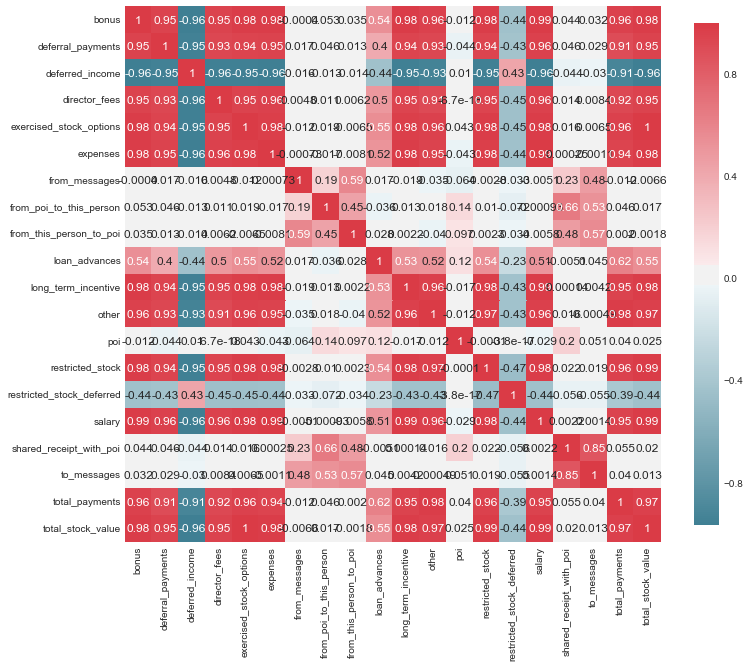

In [55]:
plot_correlation_map( df )

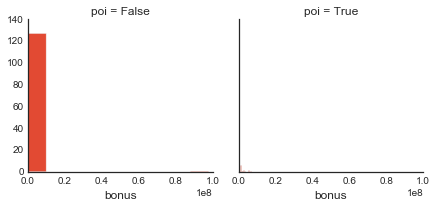

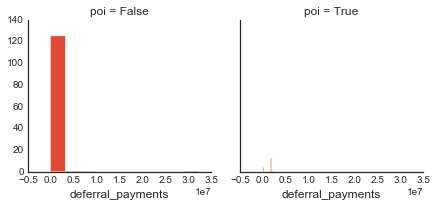

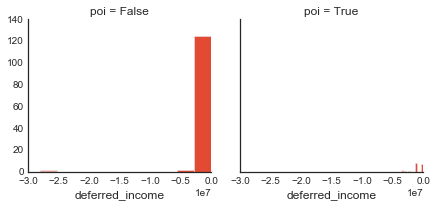

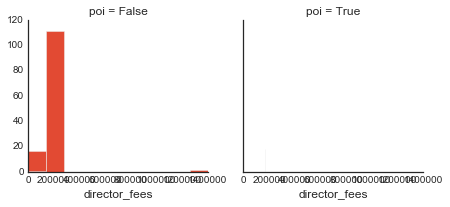

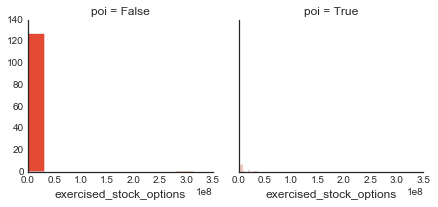

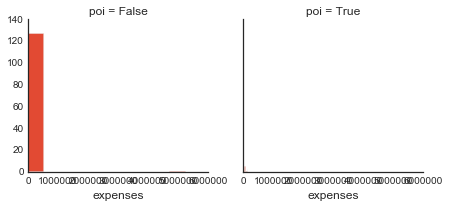

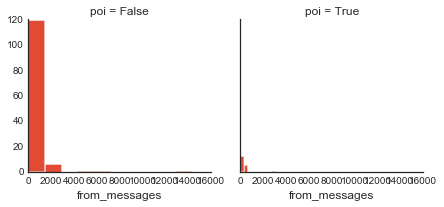

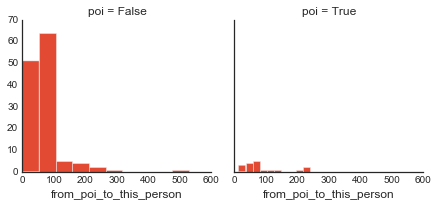

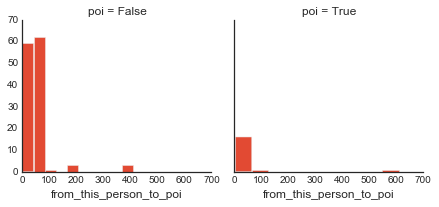

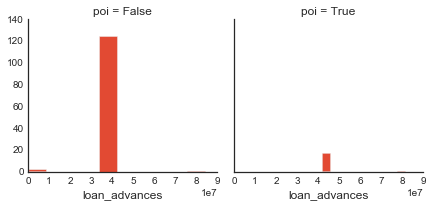

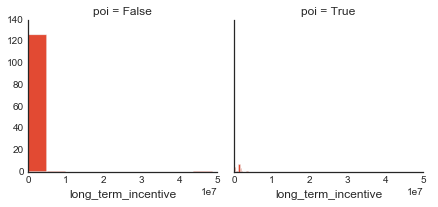

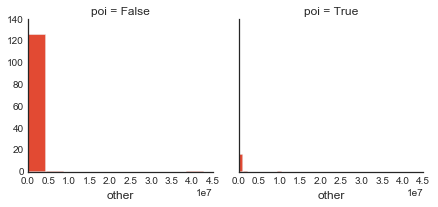

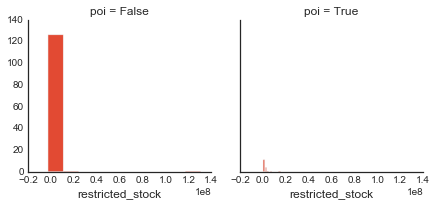

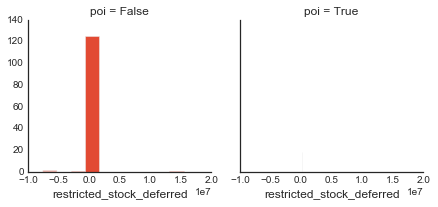

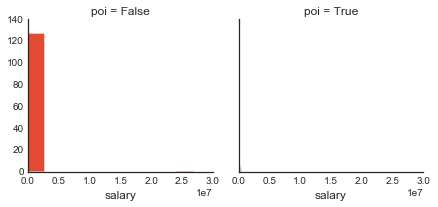

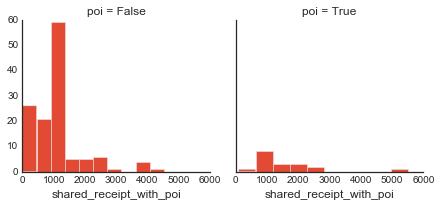

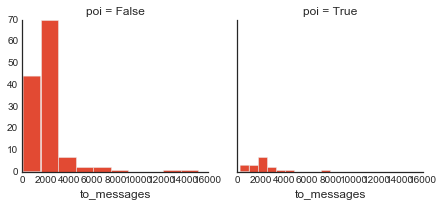

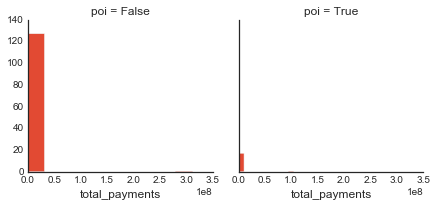

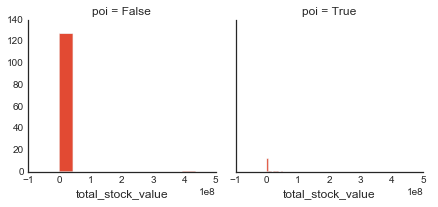

In [56]:
for col in df:
    if col not in ['poi', 'email_address']:
        grid = sns.FacetGrid(df, col='poi')
        grid.map(plt.hist, col)
        grid.add_legend();

### EDA summary

Have you enjoyed a bit of EDA?
This data set contains dozens of variables and hundreds of data.
From this we can see that it is very difficult to identify people who are POIs.
That is why we need machine learning.

# Feature Engineering

## human intuition
- People who worked for fraud may be e-mailing more with the person who worked for fraud.

## Feature Engineering result

As for the results, finally, I decided to select and use Feature Engineering feature quantities here. The feature used is fraction_from_poi.
It was selected by select K best.


## code up &  visualize

In [57]:
fraction_from_poi =[]
fraction_to_poi =[]
for key, row in df.iterrows():
    fraction_from_poi.append(row["from_poi_to_this_person"] / row["to_messages"])
    fraction_to_poi.append(row["from_this_person_to_poi"] / row["from_messages"])

df['fraction_from_poi'] = fraction_from_poi
df['fraction_to_poi'] = fraction_to_poi
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,fraction_from_poi,fraction_to_poi
ALLEN PHILLIP K,4.175000e+06,2.869717e+06,-3.081055e+06,166804.882353,phillip.allen@enron.com,1.729541e+06,13868.0,2195.000000,47.000000,65.000000,...,False,1.260270e+05,-126027.000000,201955.000000,1407.000000,2902.000000,4484442.0,1729541.0,0.016196,0.029613
BADUM JAMES P,2.374235e+06,1.789800e+05,-1.140475e+06,166804.882353,NaN,2.578170e+05,3486.0,608.790698,64.895349,41.232558,...,False,2.321741e+06,166410.555556,562194.294737,1176.465116,2073.860465,182466.0,257817.0,0.031292,0.067729
BANNANTINE JAMES M,2.374235e+06,1.642674e+06,-5.104000e+03,166804.882353,james.bannantine@enron.com,4.046157e+06,56301.0,29.000000,39.000000,0.000000,...,False,1.757552e+06,-560222.000000,477.000000,465.000000,566.000000,916197.0,5243487.0,0.068905,0.000000
BAXTER JOHN C,1.200000e+06,1.295738e+06,-1.386055e+06,166804.882353,NaN,6.680544e+06,11200.0,608.790698,64.895349,41.232558,...,False,3.942714e+06,166410.555556,267102.000000,1176.465116,2073.860465,5634343.0,10623258.0,0.031292,0.067729
BAY FRANKLIN R,4.000000e+05,2.604550e+05,-2.016410e+05,166804.882353,frank.bay@enron.com,5.987054e+06,129142.0,608.790698,64.895349,41.232558,...,False,1.457960e+05,-82782.000000,239671.000000,1176.465116,2073.860465,827696.0,63014.0,0.031292,0.067729


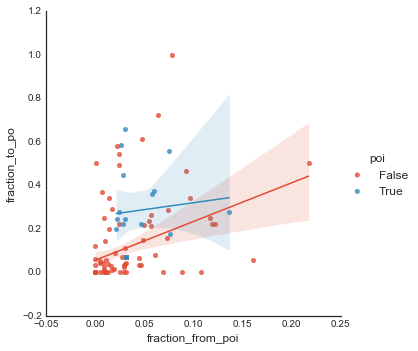

In [58]:
# Plot tip as a function of toal bill across days
g = sns.lmplot(x="fraction_from_poi", y="fraction_to_poi", hue="poi",
                          truncate=True, size=5, data=df)

# Use more informative axis labels than are provided by default
g.set_axis_labels("fraction_from_poi", "fraction_to_po")

In [59]:
X = df.drop(['email_address','poi'], axis=1)
y = df['poi']

In [60]:
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,fraction_from_poi,fraction_to_poi
ALLEN PHILLIP K,4.175000e+06,2.869717e+06,-3.081055e+06,166804.882353,phillip.allen@enron.com,1.729541e+06,13868.0,2195.000000,47.000000,65.000000,...,False,1.260270e+05,-126027.000000,201955.000000,1407.000000,2902.000000,4484442.0,1729541.0,0.016196,0.029613
BADUM JAMES P,2.374235e+06,1.789800e+05,-1.140475e+06,166804.882353,NaN,2.578170e+05,3486.0,608.790698,64.895349,41.232558,...,False,2.321741e+06,166410.555556,562194.294737,1176.465116,2073.860465,182466.0,257817.0,0.031292,0.067729
BANNANTINE JAMES M,2.374235e+06,1.642674e+06,-5.104000e+03,166804.882353,james.bannantine@enron.com,4.046157e+06,56301.0,29.000000,39.000000,0.000000,...,False,1.757552e+06,-560222.000000,477.000000,465.000000,566.000000,916197.0,5243487.0,0.068905,0.000000
BAXTER JOHN C,1.200000e+06,1.295738e+06,-1.386055e+06,166804.882353,NaN,6.680544e+06,11200.0,608.790698,64.895349,41.232558,...,False,3.942714e+06,166410.555556,267102.000000,1176.465116,2073.860465,5634343.0,10623258.0,0.031292,0.067729
BAY FRANKLIN R,4.000000e+05,2.604550e+05,-2.016410e+05,166804.882353,frank.bay@enron.com,5.987054e+06,129142.0,608.790698,64.895349,41.232558,...,False,1.457960e+05,-82782.000000,239671.000000,1176.465116,2073.860465,827696.0,63014.0,0.031292,0.067729


##  outliers

In [61]:
df.shape

(146, 23)

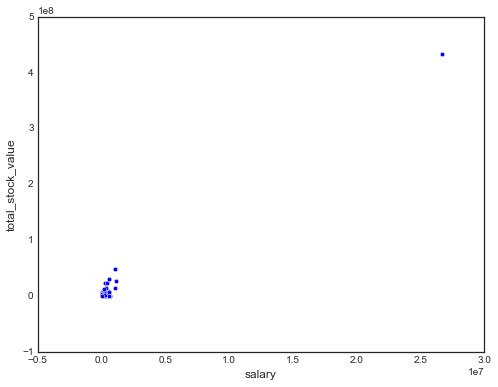

None


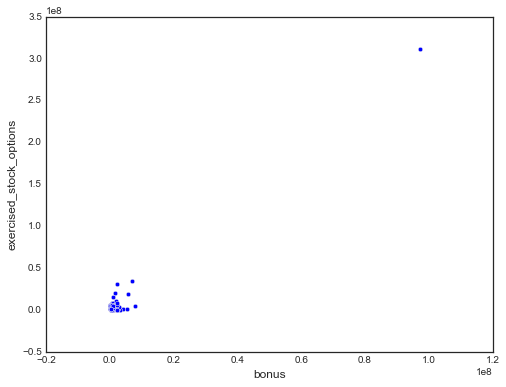

None


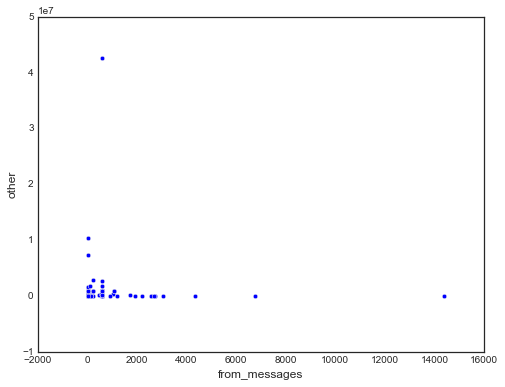

None


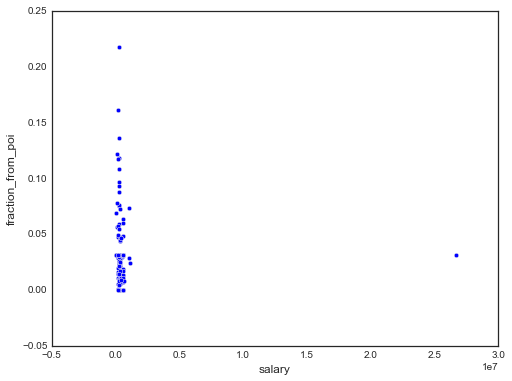

None


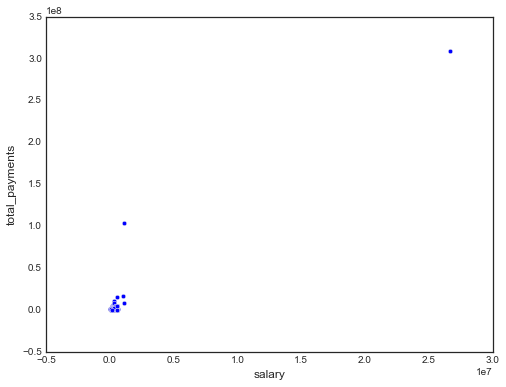

None


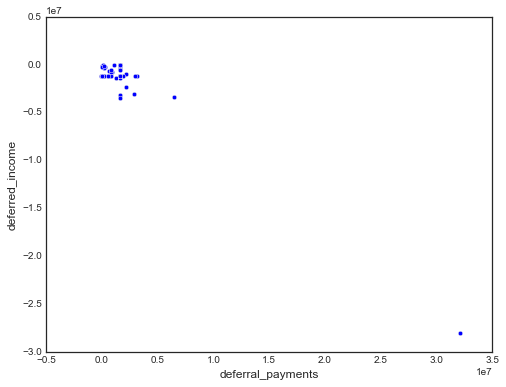

None


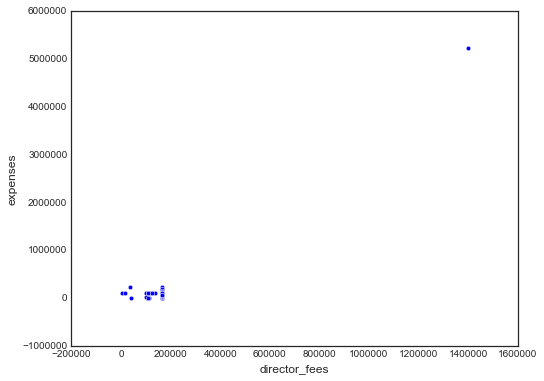

None


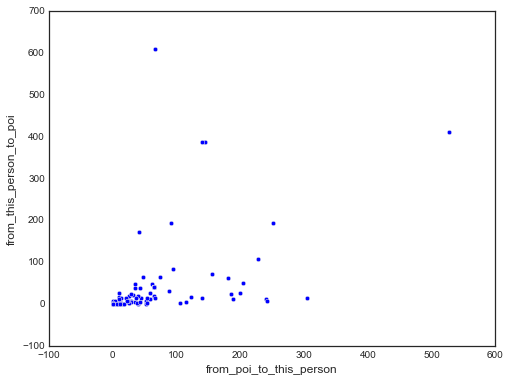

None


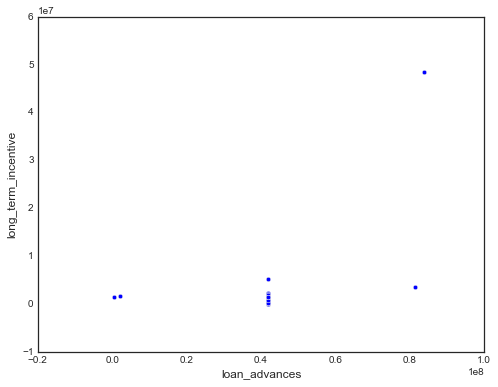

None


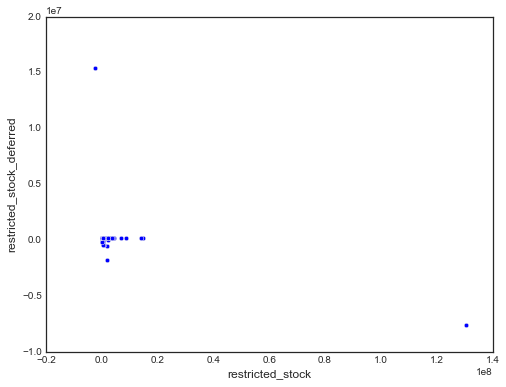

None


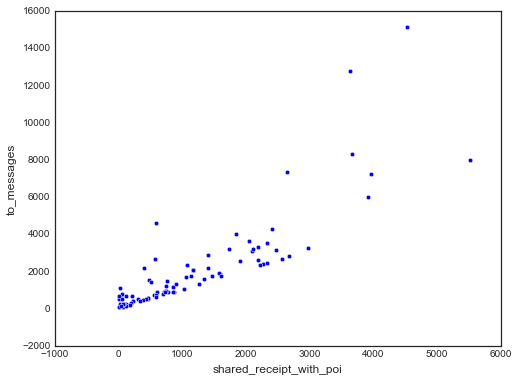

None


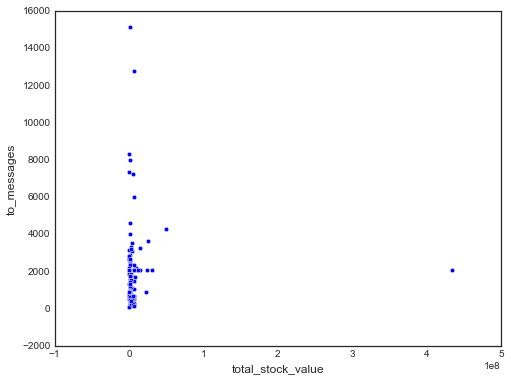

None


In [62]:
def plotOutliers(data_set, feature_x, feature_y):
    """
    This function takes a dict, 2 strings, and shows a 2d plot of 2 features
    """
    matplotlib.pyplot.scatter(data_set[feature_x], data_set[feature_y])
    matplotlib.pyplot.xlabel(feature_x)
    matplotlib.pyplot.ylabel(feature_y)
    matplotlib.pyplot.show()

"""
bonus
exercised_stock_options
from_messages
other
salary
total_payments
fraction_from_poi
poi
"""

"""
- deferral_payments: 
- deferred_income: 
- director_fees: 
- expenses: 
- from_poi_to_this_person: 
- from_this_person_to_poi: 
- loan_advances: 
- long_term_incentive: 
- restricted_stock: 
- restricted_stock_deferred: 
- shared_receipt_with_poi: 
- to_messages: 
- total_stock_value: 
"""    
    
#Visualize data to identify outliers
print(plotOutliers(df, 'salary', 'total_stock_value'))
print(plotOutliers(df, 'bonus', 'exercised_stock_options'))
print(plotOutliers(df, 'from_messages', 'other'))
print(plotOutliers(df, 'salary', 'fraction_from_poi'))
print(plotOutliers(df, 'salary', 'total_payments'))
print(plotOutliers(df, 'deferral_payments', 'deferred_income'))
print(plotOutliers(df, 'director_fees', 'expenses'))
print(plotOutliers(df, 'from_poi_to_this_person', 'from_this_person_to_poi'))
print(plotOutliers(df, 'loan_advances', 'long_term_incentive'))
print(plotOutliers(df, 'restricted_stock', 'restricted_stock_deferred'))
print(plotOutliers(df, 'shared_receipt_with_poi', 'to_messages'))
print(plotOutliers(df, 'total_stock_value', 'to_messages'))

When visualizing it, it turns out that there are obvious abnormal values. Therefore, I need to remove this abnormal value.
The outlier is the sum of all observations.

In [63]:
# http://ni4muraano.hatenablog.com/entry/2017/11/12/210000
from sklearn.ensemble import IsolationForest

# fit the model
clf = IsolationForest(n_estimators=100, max_samples=100)
clf.fit(X)
y_pred = clf.predict(X)
# non_outlier 1, outlier -1
non_outlier = 1
predicted_index = np.where(y_pred == non_outlier)

df = df.iloc[predicted_index]

In [64]:
df.shape

(131, 23)

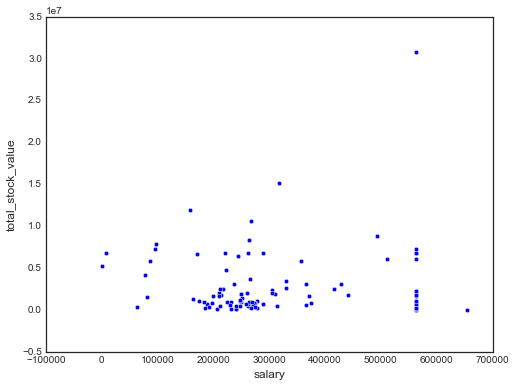

None


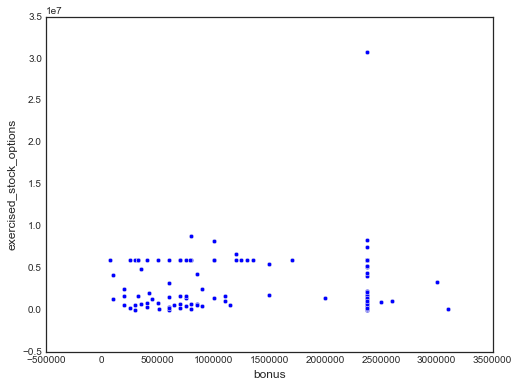

None


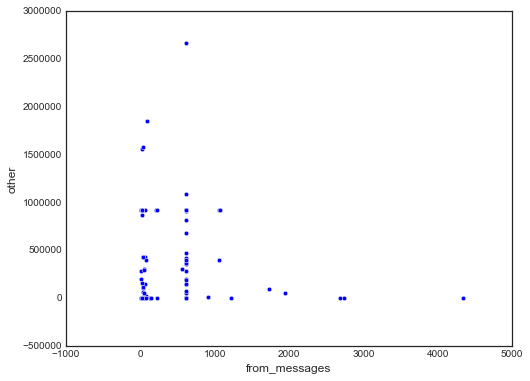

None


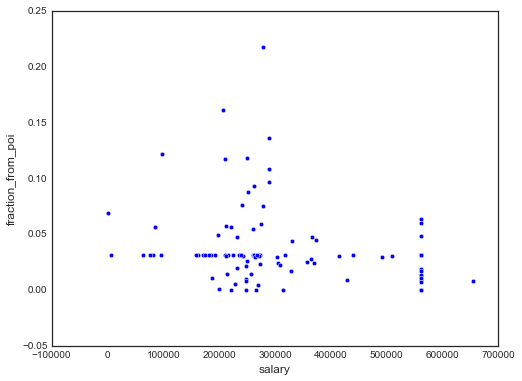

None


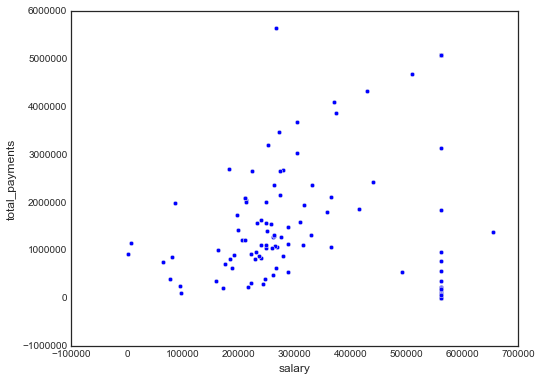

None


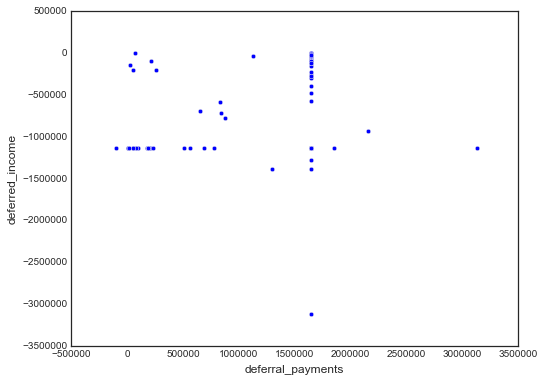

None


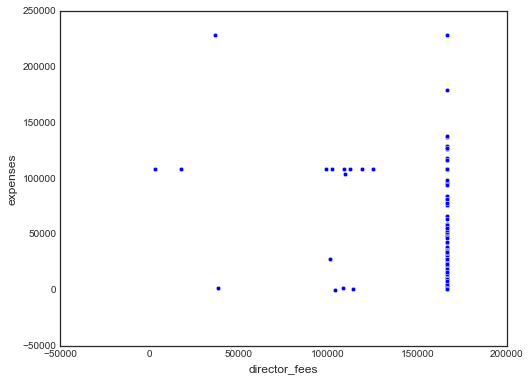

None


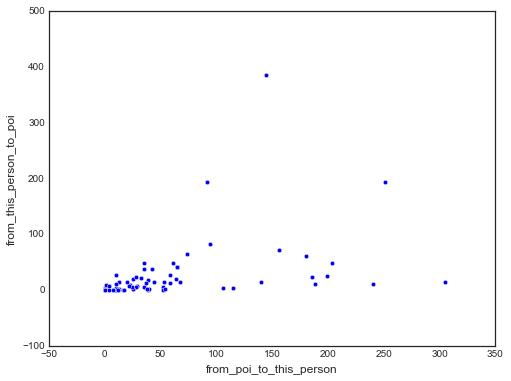

None


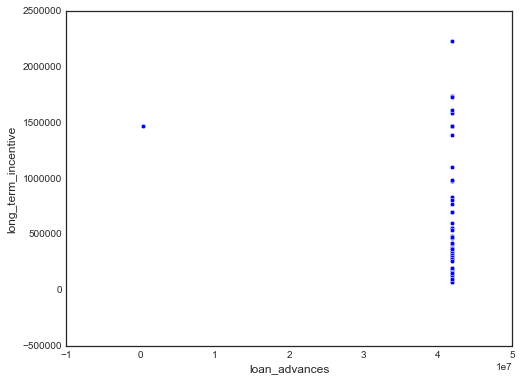

None


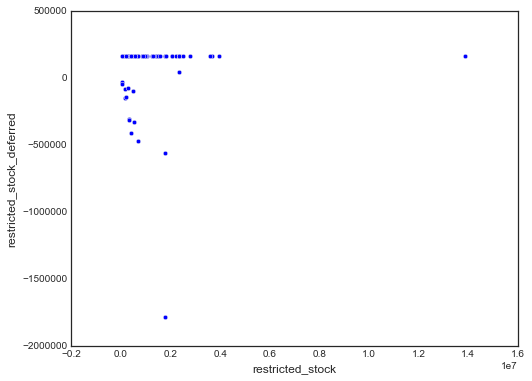

None


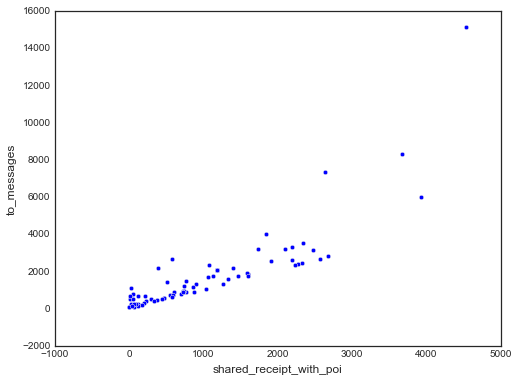

None


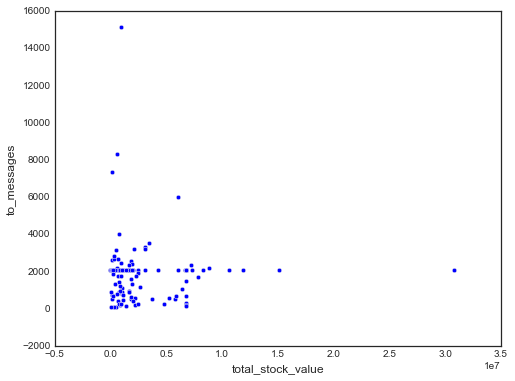

None


In [65]:
print(plotOutliers(df, 'salary', 'total_stock_value'))
print(plotOutliers(df, 'bonus', 'exercised_stock_options'))
print(plotOutliers(df, 'from_messages', 'other'))
print(plotOutliers(df, 'salary', 'fraction_from_poi'))
print(plotOutliers(df, 'salary', 'total_payments'))
print(plotOutliers(df, 'deferral_payments', 'deferred_income'))
print(plotOutliers(df, 'director_fees', 'expenses'))
print(plotOutliers(df, 'from_poi_to_this_person', 'from_this_person_to_poi'))
print(plotOutliers(df, 'loan_advances', 'long_term_incentive'))
print(plotOutliers(df, 'restricted_stock', 'restricted_stock_deferred'))
print(plotOutliers(df, 'shared_receipt_with_poi', 'to_messages'))
print(plotOutliers(df, 'total_stock_value', 'to_messages'))

The table shows that we were able to remove outliers.
Further visualization to delete outliers

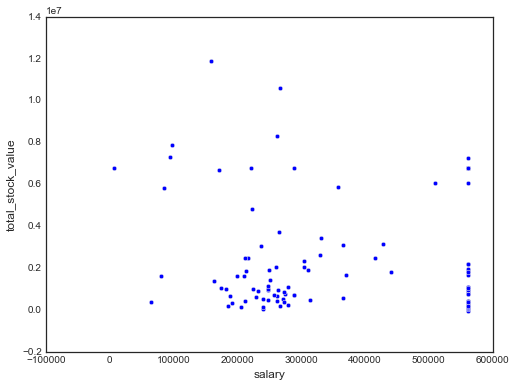

None


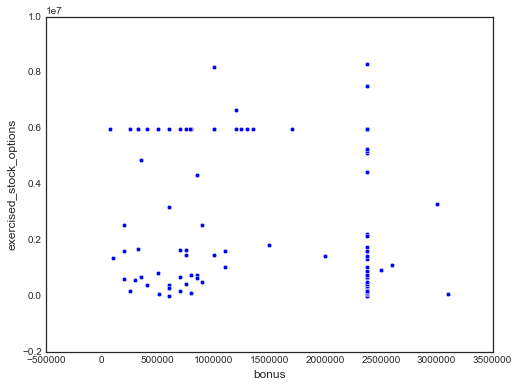

None


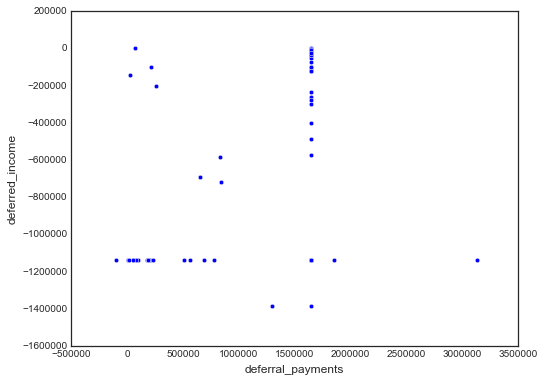

None


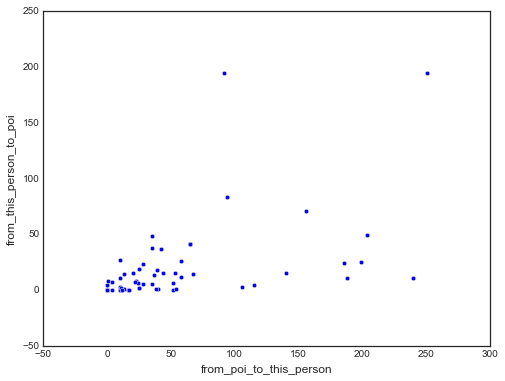

None


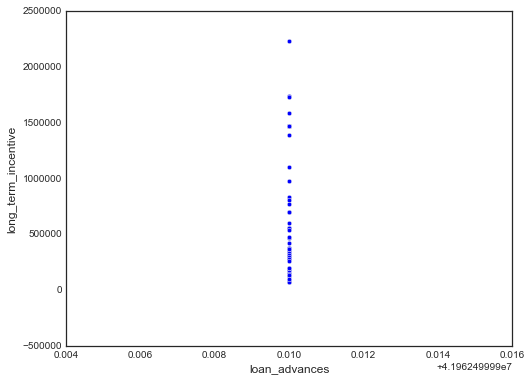

None


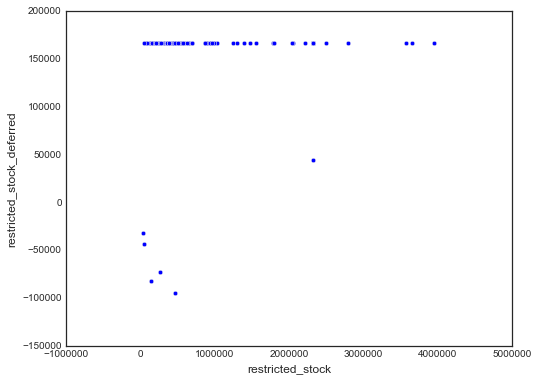

None


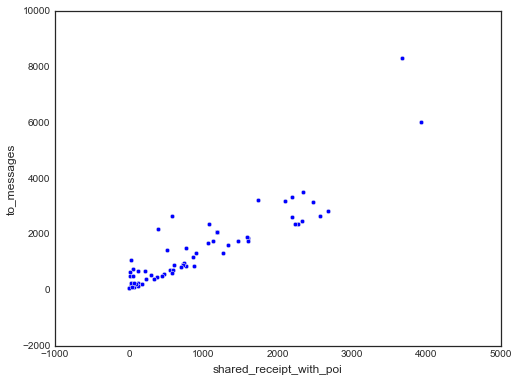

None


In [66]:
df = df[df.from_messages < 4000 ]
df = df[df.exercised_stock_options < 1e7 ]
df = df[df.deferred_income > -2000000 ]
df = df[df.from_poi_to_this_person < 300 ]
df = df[df.loan_advances > 3e7 ]
df = df[df.restricted_stock_deferred > -100000 ]
df = df[df.to_messages < 10000 ]
df = df[df.restricted_stock < 0.6e7 ]


print(plotOutliers(df, 'salary', 'total_stock_value'))
print(plotOutliers(df, 'bonus', 'exercised_stock_options'))
print(plotOutliers(df, 'deferral_payments', 'deferred_income'))
print(plotOutliers(df, 'from_poi_to_this_person', 'from_this_person_to_poi'))
print(plotOutliers(df, 'loan_advances', 'long_term_incentive'))
print(plotOutliers(df, 'restricted_stock', 'restricted_stock_deferred'))
print(plotOutliers(df, 'shared_receipt_with_poi', 'to_messages'))


In [67]:
df.shape

(115, 23)

In [70]:
df[0:30]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,fraction_from_poi,fraction_to_poi
BADUM JAMES P,2.374235e+06,1.789800e+05,-1.140475e+06,166804.882353,NaN,2.578170e+05,3486.000000,608.790698,64.895349,41.232558,...,False,2.321741e+06,166410.555556,562194.294737,1176.465116,2073.860465,182466.000,2.578170e+05,0.031292,0.067729
BAXTER JOHN C,1.200000e+06,1.295738e+06,-1.386055e+06,166804.882353,NaN,6.680544e+06,11200.000000,608.790698,64.895349,41.232558,...,False,3.942714e+06,166410.555556,267102.000000,1176.465116,2073.860465,5634343.000,1.062326e+07,0.031292,0.067729
BAY FRANKLIN R,4.000000e+05,2.604550e+05,-2.016410e+05,166804.882353,frank.bay@enron.com,5.987054e+06,129142.000000,608.790698,64.895349,41.232558,...,False,1.457960e+05,-82782.000000,239671.000000,1176.465116,2073.860465,827696.000,6.301400e+04,0.031292,0.067729
BAZELIDES PHILIP J,2.374235e+06,6.846940e+05,-1.140475e+06,166804.882353,NaN,1.599641e+06,108728.915789,608.790698,64.895349,41.232558,...,False,2.321741e+06,166410.555556,80818.000000,1176.465116,2073.860465,860136.000,1.599641e+06,0.031292,0.067729
BELFER ROBERT,2.374235e+06,-1.025000e+05,-1.140475e+06,3285.000000,NaN,3.285000e+03,108728.915789,608.790698,64.895349,41.232558,...,False,2.321741e+06,44093.000000,562194.294737,1176.465116,2073.860465,102500.000,-4.409300e+04,0.031292,0.067729
BERBERIAN DAVID,2.374235e+06,1.642674e+06,-1.140475e+06,166804.882353,david.berberian@enron.com,1.624396e+06,11892.000000,608.790698,64.895349,41.232558,...,False,8.692200e+05,166410.555556,216582.000000,1176.465116,2073.860465,228474.000,2.493616e+06,0.031292,0.067729
BERGSIEKER RICHARD P,2.500000e+05,1.642674e+06,-4.858130e+05,166804.882353,rick.bergsieker@enron.com,5.987054e+06,59175.000000,59.000000,4.000000,0.000000,...,False,6.592490e+05,166410.555556,187922.000000,233.000000,383.000000,618850.000,6.592490e+05,0.010444,0.000000
BIBI PHILIPPE A,1.000000e+06,1.642674e+06,-1.140475e+06,166804.882353,philippe.bibi@enron.com,1.465734e+06,38559.000000,40.000000,23.000000,8.000000,...,False,3.780820e+05,166410.555556,213625.000000,1336.000000,1607.000000,2047593.000,1.843816e+06,0.014312,0.200000
BLACHMAN JEREMY M,8.500000e+05,1.642674e+06,-1.140475e+06,166804.882353,jeremy.blachman@enron.com,7.653130e+05,84208.000000,14.000000,25.000000,2.000000,...,False,1.890410e+05,166410.555556,248546.000000,2326.000000,2475.000000,2014835.000,9.543540e+05,0.010101,0.142857
BLAKE JR. NORMAN P,2.374235e+06,1.642674e+06,-1.137840e+05,113784.000000,NaN,5.987054e+06,1279.000000,608.790698,64.895349,41.232558,...,False,2.321741e+06,166410.555556,562194.294737,1176.465116,2073.860465,1279.000,6.773957e+06,0.031292,0.067729


In [71]:
df[30:70]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,fraction_from_poi,fraction_to_poi
ELLIOTT STEVEN,3.500000e+05,1.642674e+06,-4.007290e+05,166804.882353,steven.elliott@enron.com,4.890344e+06,78552.000000,608.790698,64.895349,41.232558,...,False,1.788391e+06,166410.555556,170941.000000,1176.465116,2073.860465,211725.000,6.678735e+06,0.031292,0.067729
FALLON JAMES B,2.500000e+06,1.642674e+06,-1.140475e+06,166804.882353,jim.fallon@enron.com,9.402570e+05,95924.000000,75.000000,42.000000,37.000000,...,False,1.392142e+06,166410.555556,304588.000000,1604.000000,1755.000000,3676340.000,2.332399e+06,0.023932,0.493333
FASTOW ANDREW S,1.300000e+06,1.642674e+06,-1.386055e+06,166804.882353,andrew.fastow@enron.com,5.987054e+06,55921.000000,608.790698,64.895349,41.232558,...,True,1.794412e+06,166410.555556,440698.000000,1176.465116,2073.860465,2424083.000,1.794412e+06,0.031292,0.067729
FITZGERALD JAY L,3.500000e+05,1.642674e+06,-1.140475e+06,166804.882353,jay.fitzgerald@enron.com,6.644610e+05,23870.000000,16.000000,1.000000,8.000000,...,False,9.567750e+05,166410.555556,199157.000000,723.000000,936.000000,1414857.000,1.621236e+06,0.001068,0.500000
FOWLER PEGGY,2.374235e+06,1.642674e+06,-1.140475e+06,166804.882353,kulvinder.fowler@enron.com,1.324578e+06,108728.915789,36.000000,0.000000,0.000000,...,False,5.601700e+05,166410.555556,562194.294737,10.000000,517.000000,5081526.488,1.884748e+06,0.000000,0.000000
FOY JOE,2.374235e+06,1.817550e+05,-1.140475e+06,166804.882353,tracy.foy@enron.com,3.434340e+05,108728.915789,13.000000,0.000000,0.000000,...,False,2.321741e+06,166410.555556,562194.294737,2.000000,57.000000,181755.000,3.434340e+05,0.000000,0.000000
FUGH JOHN L,2.374235e+06,5.059100e+04,-1.140475e+06,166804.882353,NaN,1.763780e+05,108728.915789,608.790698,64.895349,41.232558,...,False,2.321741e+06,166410.555556,562194.294737,1176.465116,2073.860465,50591.000,1.763780e+05,0.031292,0.067729
GAHN ROBERT S,5.098700e+05,7.312200e+04,-1.042000e+03,166804.882353,NaN,8.323700e+04,50080.000000,608.790698,64.895349,41.232558,...,False,2.353700e+05,166410.555556,192008.000000,1176.465116,2073.860465,900585.000,3.186070e+05,0.031292,0.067729
GARLAND C KEVIN,8.500000e+05,1.642674e+06,-1.140475e+06,166804.882353,kevin.garland@enron.com,6.362460e+05,48405.000000,44.000000,10.000000,27.000000,...,False,2.599070e+05,166410.555556,231946.000000,178.000000,209.000000,1566469.000,8.961530e+05,0.047847,0.613636
GATHMANN WILLIAM D,2.374235e+06,1.642674e+06,-1.140475e+06,166804.882353,NaN,1.753766e+06,108728.915789,608.790698,64.895349,41.232558,...,False,2.640130e+05,-72419.000000,562194.294737,1176.465116,2073.860465,5081526.488,1.945360e+06,0.031292,0.067729


In [72]:
df[70:117]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,fraction_from_poi,fraction_to_poi
MENDELSOHN JOHN,2.374235e+06,1.642674e+06,-1.037500e+05,103750.000000,NaN,5.987054e+06,148.000000,608.790698,64.895349,41.232558,...,False,2.321741e+06,166410.555556,562194.294737,1176.465116,2073.860465,148.000,6.773957e+06,0.031292,0.067729
METTS MARK,6.000000e+05,1.642674e+06,-1.140475e+06,166804.882353,mark.metts@enron.com,5.987054e+06,94299.000000,29.000000,38.000000,1.000000,...,False,5.850620e+05,166410.555556,365788.000000,702.000000,807.000000,1061827.000,5.850620e+05,0.047088,0.034483
MEYER JEROME J,2.374235e+06,1.642674e+06,-3.834600e+04,38346.000000,NaN,5.987054e+06,2151.000000,608.790698,64.895349,41.232558,...,False,2.321741e+06,166410.555556,562194.294737,1176.465116,2073.860465,2151.000,6.773957e+06,0.031292,0.067729
MEYER ROCKFORD G,2.374235e+06,1.848227e+06,-1.140475e+06,166804.882353,rockford.meyer@enron.com,4.934890e+05,108728.915789,28.000000,0.000000,0.000000,...,False,4.623840e+05,166410.555556,562194.294737,22.000000,232.000000,1848227.000,9.558730e+05,0.000000,0.000000
MORAN MICHAEL P,2.374235e+06,1.642674e+06,-1.140475e+06,166804.882353,michael.moran@enron.com,5.953900e+04,108728.915789,19.000000,0.000000,0.000000,...,False,1.616020e+05,166410.555556,562194.294737,127.000000,672.000000,5081526.488,2.211410e+05,0.000000,0.000000
MORDAUNT KRISTINA M,3.250000e+05,1.642674e+06,-1.140475e+06,166804.882353,kristina.mordaunt@enron.com,5.987054e+06,35018.000000,608.790698,64.895349,41.232558,...,False,2.085100e+05,166410.555556,267093.000000,1176.465116,2073.860465,628522.000,2.085100e+05,0.031292,0.067729
MULLER MARK S,1.100000e+06,8.429240e+05,-7.190000e+05,166804.882353,s..muller@enron.com,1.056320e+06,108728.915789,16.000000,12.000000,0.000000,...,False,3.605280e+05,166410.555556,251654.000000,114.000000,136.000000,3202070.000,1.416848e+06,0.088235,0.000000
MURRAY JULIA H,4.000000e+05,1.642674e+06,-1.140475e+06,166804.882353,julia.murray@enron.com,4.004780e+05,57580.000000,45.000000,11.000000,2.000000,...,False,1.969830e+05,166410.555556,229284.000000,395.000000,2192.000000,812194.000,5.974610e+05,0.005018,0.044444
NOLES JAMES L,2.374235e+06,7.744010e+05,-1.140475e+06,166804.882353,NaN,5.987054e+06,108728.915789,608.790698,64.895349,41.232558,...,False,4.632610e+05,-94556.000000,562194.294737,1176.465116,2073.860465,774401.000,3.687050e+05,0.031292,0.067729
OLSON CINDY K,7.500000e+05,7.771600e+04,-1.140475e+06,166804.882353,cindy.olson@enron.com,1.637034e+06,63791.000000,52.000000,20.000000,15.000000,...,False,9.697290e+05,166410.555556,329078.000000,856.000000,1184.000000,1321557.000,2.606763e+06,0.016892,0.288462


### manual detect outliers
**THE TRAVEL AGENCY IN THE PARK is not human**


In [78]:
df = df.drop("THE TRAVEL AGENCY IN THE PARK")
df.shape

(114, 23)

# Feature Selection

## Missing Not At Random (MNAR).  

When retrieving the pattern of missing values, we can see that both restricted_stock_deferred and loan_advances have a very strong correlation of 0.97 or more.  
Therefore, by not using these variables, put the data set in the state of Missing Completely At Random (MCAR).

In [100]:
df = df.drop(["restricted_stock_deferred", "loan_advances"],axis=1)

## human intuition
It will not directly affect what the email is. Because you do not change email with attributes such as title.


In [101]:
df = df.drop(["email_address"],axis=1)

## select features

In [106]:
from sklearn.feature_selection import SelectKBest

y = df["poi"]
X = df.drop("poi",axis=1)
selector = SelectKBest( k=10) 
selector.fit(X, y)
print(selector.scores_)
mask = selector.get_support()   

[5.03243376e+00 2.42450947e-02 4.41642424e+00 1.34154044e+00
 2.69049117e+00 1.18763148e+00 1.91698610e+00 8.22462167e+00
 9.89504146e-02 7.81650778e-01 2.30728617e+00 8.11185667e-03
 3.61763448e+00 2.39952341e+00 9.39613548e-02 7.86300003e-02
 1.79717686e-01 3.38864856e+00 7.80037331e+00]


Those with low importance are cut. (Ex 9.39613548e - 02) When trying to cut them, the best K is 10.

In [107]:
X_selected = selector.transform(X)
print "X.shape={}, X_selected.shape={}".format(X.shape, X_selected.shape)

X.shape=(113, 19), X_selected.shape=(113, 10)


In [108]:
new_cul_names = []
for cul, sup in zip(df.columns, selector.get_support()):
    print sup
    if sup == True:
        new_cul_names.append(cul)
print new_cul_names

True
False
True
False
True
False
True
True
False
False
True
False
True
True
False
False
False
True
True
['bonus', 'deferred_income', 'exercised_stock_options', 'from_messages', 'from_poi_to_this_person', 'other', 'restricted_stock', 'salary', 'total_stock_value', 'fraction_from_poi']


In [109]:
df_ref = pd.DataFrame(X_selected, index=df.index, columns=new_cul_names)
df_ref["poi"] = df.poi

In [110]:
# plot_correlation_map(df_ref)

In [111]:
for cul in df_ref.columns:
    print cul

bonus
deferred_income
exercised_stock_options
from_messages
from_poi_to_this_person
other
restricted_stock
salary
total_stock_value
fraction_from_poi
poi


### manual selection

I chose several features from domain knowledge.

- poi
- from_poi_to_this_person
- from_this_person_to_poi
- shared_receipt_with_poi

**from_poi_to_this_person、from_this_person_to_poi,shared_receipt_with_poi **  
The reason for choosing is that people of poi are thinking that they are doing many interactions with people of POI.

In [46]:
df_manual = df[["poi","from_poi_to_this_person","from_this_person_to_poi","shared_receipt_with_poi"]]

In [47]:
df = df_ref

## Feature Scaling

Depending on the amount of features there are those with very large units and those with small units. Therefore, perform feature scaling




In [49]:
df.head()

,bonus,deferred_income,exercised_stock_options,from_poi_to_this_person,restricted_stock,total_stock_value,fraction_from_poi,poi
BADUM JAMES P,2.374235e+06,-1.140475e+06,2.578170e+05,64.895349,562194.294737,0.031292,0.067729,False
BAXTER JOHN C,1.200000e+06,-1.386055e+06,6.680544e+06,64.895349,267102.000000,0.031292,0.067729,False
BAY FRANKLIN R,4.000000e+05,-2.016410e+05,5.987054e+06,64.895349,239671.000000,0.031292,0.067729,False
BAZELIDES PHILIP J,2.374235e+06,-1.140475e+06,1.599641e+06,64.895349,80818.000000,0.031292,0.067729,False
BELFER ROBERT,2.374235e+06,-1.140475e+06,3.285000e+03,64.895349,562194.294737,0.031292,0.067729,False


In [50]:
poi = df['poi']

In [51]:
# new_val= preprocessing.scale(df.drop('poi', axis=1))
# df = pd.DataFrame(new_val, columns=new_cul_names, index=df.index)

In [52]:
df.head()

,bonus,deferred_income,exercised_stock_options,from_poi_to_this_person,restricted_stock,total_stock_value,fraction_from_poi,poi
BADUM JAMES P,2.374235e+06,-1.140475e+06,2.578170e+05,64.895349,562194.294737,0.031292,0.067729,False
BAXTER JOHN C,1.200000e+06,-1.386055e+06,6.680544e+06,64.895349,267102.000000,0.031292,0.067729,False
BAY FRANKLIN R,4.000000e+05,-2.016410e+05,5.987054e+06,64.895349,239671.000000,0.031292,0.067729,False
BAZELIDES PHILIP J,2.374235e+06,-1.140475e+06,1.599641e+06,64.895349,80818.000000,0.031292,0.067729,False
BELFER ROBERT,2.374235e+06,-1.140475e+06,3.285000e+03,64.895349,562194.294737,0.031292,0.067729,False


In [53]:
# Label Encoding (poi)
le = preprocessing.LabelEncoder()
le.fit(poi)
poi = le.transform(poi)
df['poi'] = poi
df.head()

,bonus,deferred_income,exercised_stock_options,from_poi_to_this_person,restricted_stock,total_stock_value,fraction_from_poi,poi
BADUM JAMES P,2.374235e+06,-1.140475e+06,2.578170e+05,64.895349,562194.294737,0.031292,0.067729,0
BAXTER JOHN C,1.200000e+06,-1.386055e+06,6.680544e+06,64.895349,267102.000000,0.031292,0.067729,0
BAY FRANKLIN R,4.000000e+05,-2.016410e+05,5.987054e+06,64.895349,239671.000000,0.031292,0.067729,0
BAZELIDES PHILIP J,2.374235e+06,-1.140475e+06,1.599641e+06,64.895349,80818.000000,0.031292,0.067729,0
BELFER ROBERT,2.374235e+06,-1.140475e+06,3.285000e+03,64.895349,562194.294737,0.031292,0.067729,0


In [56]:
# Label Encoding (poi)
df_manual['poi'] = poi
df_manual.head(10)

,poi,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi
BADUM JAMES P,0,64.895349,41.232558,1176.465116
BAXTER JOHN C,0,64.895349,41.232558,1176.465116
BAY FRANKLIN R,0,64.895349,41.232558,1176.465116
BAZELIDES PHILIP J,0,64.895349,41.232558,1176.465116
BELFER ROBERT,0,64.895349,41.232558,1176.465116
BERBERIAN DAVID,0,64.895349,41.232558,1176.465116
BERGSIEKER RICHARD P,0,4.000000,0.000000,233.000000
BIBI PHILIPPE A,0,23.000000,8.000000,1336.000000
BLACHMAN JEREMY M,0,25.000000,2.000000,2326.000000
BLAKE JR. NORMAN P,0,64.895349,41.232558,1176.465116


# Choose Algorithm

![ml map](assets/ml_map.png)

I thought of several algorithms along the algorithm selection chart.
Although the ensemble method (random forest) and LinearSVC had high accuracy, the recall value was extremely low. Therefore, I decided to select KNN as an algorithm finally.

## metrics

For this time, I used precision and recall to confirm the performance.

Recall in this context is also referred to as the true positive rate or sensitivity, and precision is also referred to as positive predictive value (PPV); other related measures used in classification include true negative rate and accuracy.

$$
precision=\frac{TP}{TP+FP}
$$

$$
recall=\frac{TP}{TP+FN}
$$

```
TP: Predicted as poi = true, what actually was poi = true
FP = Predicted as poi = false, what actually was poi = false
FN = Predicted as poi = false, But actually was poi = true
```


### Performance of the final algorithm selected is assessed by splitting the data into training and testing sets or through the use of cross validation, noting the specific type of validation performed.




## test split validation
I used Cross Validation train_test_split function to split 30% of my dataset as for testing. then I used sklearn.metrics accuracy, precision and recall scores to validate my algorithms.

In [58]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from numpy import mean

### http://scikit-learn.org/stable/modules/pipeline.html
def evaluate_clf(grid_search, features, labels, params, iters=100):
    acc = []
    pre = []
    recall = []
    for i in range(iters):
        features_train, features_test, labels_train, labels_test = \
        train_test_split(features, labels, test_size=0.3, random_state=i)
        grid_search.fit(features_train, labels_train)
        predictions = grid_search.predict(features_test)
        acc = acc + [accuracy_score(labels_test, predictions)]
        pre = pre + [precision_score(labels_test, predictions)]
        recall = recall + [recall_score(labels_test, predictions)]
    print "accuracy: {}".format(mean(acc))
    print "precision: {}".format(mean(pre))
    print "recall:    {}".format(mean(recall))
    best_params = grid_search.best_estimator_.get_params()
    for param_name in params.keys():
        print("%s = %r, " % (param_name, best_params[param_name]))
    return grid_search.best_estimator_

## validation

In machine learning, model validation is referred to as the process where a trained model is evaluated with a testing data set.
The testing data set is a separate portion of the same data set from which the training set is derived.
The main purpose of using the testing data set is to test the generalization ability of a trained model (Alpaydin 2010).

Validating data is extremely important.
The reason being is that at times data is not always perfect there can be imbalance within it which leads to skewed or biased results.

## metric
In this survey we want to prevent classifying fraud workers as not working wrong. This is to allow for preliminary use of the classification system. Therefore, recall is used for the evaluation function

In [59]:

y = df['poi'] 
X = df.drop('poi',axis=1)

y_m = df_manual['poi'] 
X_m = df_manual.drop('poi',axis=1)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
grid = {
    'n_neighbors': [1,2,3,4,5]
}

gs = GridSearchCV(KNeighborsClassifier(),grid)
print("Evaluate KNeighborsClassifier model")
clf = evaluate_clf(gs, X, y, grid)



Evaluate KNeighborsClassifier model


/Users/akihiro/.pyenv/versions/anaconda-4.0.0/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy: 0.912571428571
precision: 0.477619047619
recall:    0.296666666667
n_neighbors = 2, 


In [61]:

from sklearn import naive_bayes
nb_clf = naive_bayes.GaussianNB()
nb_param = {}
nb_grid_search = GridSearchCV(nb_clf, nb_param)

print("Evaluate naive bayes model")
clf = evaluate_clf(nb_grid_search, X, y, nb_param)

Evaluate naive bayes model
accuracy: 0.886571428571
precision: 0.356357142857
recall:    0.289166666667


manual selection

In [62]:
from sklearn.neighbors import KNeighborsClassifier
grid = {
    'n_neighbors': [1,2,3,4,5]
}

gs = GridSearchCV(KNeighborsClassifier(),grid)
print("Evaluate KNeighborsClassifier model")
clf = evaluate_clf(gs, X_m, y_m, grid)

Evaluate KNeighborsClassifier model
accuracy: 0.900571428571
precision: 0.00552631578947
recall:    0.00583333333333
n_neighbors = 2, 


In [63]:
from sklearn import naive_bayes
nb_clf = naive_bayes.GaussianNB()
nb_param = {}
nb_grid_search = GridSearchCV(nb_clf, nb_param)

print("Evaluate naive bayes model")
clf = evaluate_clf(nb_grid_search, X_m, y_m, nb_param)

Evaluate naive bayes model
accuracy: 0.905142857143
precision: 0.364
recall:    0.234333333333


### manual vs SelectKBest

Although the accuracy is better in the manual, selectK is better for recall and precision.


Perform cross validation as follows.

In [ ]:
from sklearn.cross_validation import train_test_split
eatures_train, features_test, labels_train, labels_test = \
        train_test_split(features, labels, test_size = 0.3, random_state = 42)

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(labels_test, predicts)
precision_score(labels_test, predicts)
recall_score(labels_test, predicts)

## SGD(Stochastic gradient descent)
[sklearn document](http://scikit-learn.org/stable/modules/sgd.html#id1)

The advantages of Stochastic Gradient Descent are:

- Efficiency.
- Ease of implementation (lots of opportunities for code tuning).

The disadvantages of Stochastic Gradient Descent include:

- SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
- SGD is sensitive to feature scaling.

### loss

>The ‘log’ loss gives logistic regression, a probabilistic classifier. ‘modified_huber’ is another smooth loss that brings tolerance to outliers as well as probability estimates. ‘squared_hinge’ is like hinge but is quadratically penalized. ‘perceptron’ is the linear loss used by the perceptron algorithm. The other losses are designed for regression but can be useful in classification as well; see SGDRegressor for a description.

- hinge 
- squared_hinge


### penalty
>The penalty (aka regularization term) to be used. Defaults to ‘l2’ which is the standard regularizer for linear SVM models. ‘l1’ and ‘elasticnet’ might bring sparsity to the model (feature selection) not achievable with ‘l2’.

Since this data set is not sparse, choose the default l2.


### alpha : float

>Constant that multiplies the regularization term. Defaults to 0.0001 Also used to compute learning_rate when set to ‘optimal’.

- 0.0001
- 0.0002
- 0.001
- 0.01
- 0.1

## What does it mean to tune the parameters of an algorithm

In machine learning, the precision varies depending on the numerical value of a parameter in a certain model. This is because we have to construct the most fitting model for the data set. Also, depending on the data set, the optimal parameters are different.

In [55]:
# SGD tuning
grid = {
    'alpha': [0.0001,0.0002,0.001,0.01,0.1], # learning rate
    'n_iter': [1000], # number of epochs
    'loss': ['hinge' , 'squared_hinge'], 
    'penalty': ['l2'],
    'n_jobs': [-1]
}

In [ ]:
from sklearn.linear_model import SGDClassifier

gs = GridSearchCV(SGDClassifier(),grid)
print("Evaluate SGDClassifier model")
# clf = evaluate_clf(gs, X, y, grid)